In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


**<h1> CYCLISTIC BUSINESS ANALYSIST**
**<H2> INTRODUCTION** 
<p> This notebook is the Capstone Project of Google Data Analytics Certificate. In this case study, we will use the dataset of divvy. The main question is that "How to annual members and casual members use Cyclistic bikes differently?

**<h2> ASK**
**<p> Key tasks**
1.   *Identify the business task*
<p> The key business task is to identify the difference between the casual and member users of Cyclistic and determine the strategies to turn casual riders into annual riders.
2.   *Consider key stakeholders*
    **<p> Key stakeholders:**
    1.   Primary stakeholders:
      *   Lily Moreno, Director of Marketing
      *   Cyclistic Executive Team

    2.   Secondary stakeholders: 
      *   Marketing Analytics Team




**<h2> PPREPARE**
<p> The Divvy dataset will be used in this case study. 
<p> The link of dataset: https://divvy-tripdata.s3.amazonaws.com/index.html
<p> The time period in consideration is from July 1st 2021 to June 30th 2022
<p> The dataset includes 12 CSV files corresponding to 12 months in the observed period. Each file contains 13 columns, each represents a field relating to the use of the bike service provided by Cyclistic.


**<p> Key tasks**
1.   *Download data and store it appropriately.*
2.   *Identify how it’s organized*


**IMPORT LIBRARIES**
<p> Import necessary librabries

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime # for date processing
import seaborn as sns
import folium # for mapping

**IMPORT CSV FILES AND CONCATENATE**
<p> Import the dataset and concatenate them into one dataframe

In [3]:
df_202107 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202107-divvy-tripdata.csv')
df_202108 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202108-divvy-tripdata.csv')
df_202109 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202109-divvy-tripdata.csv')
df_202110 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202110-divvy-tripdata.csv')
df_202111 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202111-divvy-tripdata.csv')
df_202112 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202112-divvy-tripdata.csv')
df_202201 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202201-divvy-tripdata.csv')
df_202202 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202202-divvy-tripdata.csv')
df_202203 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202203-divvy-tripdata.csv')
df_202204 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202204-divvy-tripdata.csv')
df_202205 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202205-divvy-tripdata.csv')
df_202206 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Cyclistic/202206-divvy-tripdata.csv')


In [4]:
df = pd.concat([df_202107, df_202108, df_202109, df_202110, df_202111, df_202112, df_202201, df_202202, df_202203, df_202204, df_202205, df_202206],ignore_index=True, sort=False)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900380,7B3B2890CA85E05D,classic_bike,2022-06-25 00:56:48,2022-06-25 01:01:39,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member
5900381,1E993989CC66BCBC,classic_bike,2022-06-25 00:56:25,2022-06-25 01:00:26,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member
5900382,AEA166296BC67566,electric_bike,2022-06-12 12:47:12,2022-06-12 12:47:36,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Fullerton Ave,428,41.920000,-87.700000,41.920000,-87.700000,casual
5900383,B9F527742959CF03,classic_bike,2022-06-12 13:28:46,2022-06-12 13:53:11,Clark St & Randolph St,TA1305000030,Clark St & Randolph St,TA1305000030,41.884576,-87.631890,41.884576,-87.631890,casual


**<h2> PROCESS**
**<p> KEY TASK**
+ Convert started_at and ended_at columns to datetime
+ Check for na and duplicated values to ensure the data's integrity
+ Create new columns 
      - Ride Duration: the amount of time the bikes were rode
      - Weekday: The number of ride turns per weekday
      - Month: The number of ride turns per month

**FORMAT**
<p> Convert columns to the right format

In [5]:
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["started_at"] = pd.to_datetime(df["started_at"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 585.2+ MB


**CHECK FOR DUPLICATES AND NA VALUES**
<p> In order to ensure the data's integrity, we should check the duplicates and na values in the dataset. 

In [6]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    836018
start_station_id      836015
end_station_name      892103
end_station_id        892103
start_lat                  0
start_lng                  0
end_lat                 5374
end_lng                 5374
member_casual              0
dtype: int64

Besides start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng, the other columns have no NA values. There are multiple ways to deal with NA values; however, since the number of rows with missing values accounts for a big proportion of this dataset and it seems that the cause of these missing values is the issue in the collecting phase, I choose to ignore such columns during my analysis. 

In [7]:
df.duplicated().sum()

0

There is no duplicated row in this dataset, and it is a good thing. 

**CALCULATE THE RIDE DURATION FOR EACH RIDE**
<p> By taking the difference between the ended_at and started_at columns, the ride duration can be easily calculated. 

In [8]:
df['Ride_Duration'] = df['ended_at'] - df['started_at']
df['Ride_Duration']

0         0 days 00:35:22
1         0 days 00:18:27
2         0 days 00:17:50
3         0 days 00:15:02
4         0 days 00:19:03
                ...      
5900380   0 days 00:04:51
5900381   0 days 00:04:01
5900382   0 days 00:00:24
5900383   0 days 00:24:25
5900384   0 days 00:27:23
Name: Ride_Duration, Length: 5900385, dtype: timedelta64[ns]

**CALCULATE THE WEEKDAY OF EACH RIDE**

In [9]:
df['Weekday'] = df['started_at'].dt.dayofweek
df['Weekday']

0          4
1          2
2          6
3          3
4          2
          ..
5900380    5
5900381    5
5900382    6
5900383    6
5900384    6
Name: Weekday, Length: 5900385, dtype: int64

**CALCULATE THE MONTH OF EACH RIDE**

In [10]:
df['month'] = pd.to_datetime(df['started_at']).dt.month
df['month']

0          7
1          7
2          7
3          7
4          7
          ..
5900380    6
5900381    6
5900382    6
5900383    6
5900384    6
Name: month, Length: 5900385, dtype: int64

**<h2> ANALYZE**
<p> In this step, the dataset will be analyzed to discover the patterns, trends, relationships and differences between the casual and member users.

**CALCULATE THE NUMBER OF RIDES PER TYPE OF USERS**


In [11]:
df_overall = df.loc[df['Ride_Duration'] > timedelta(0)] \
               .groupby(['member_casual'], as_index=False ) \
               .agg({'Ride_Duration':'mean','ride_id':'count'}) \
               .rename(columns = {'member_casual':'Member','Ride_Duration':'AVG Ride Duration', 'ride_id':'Count'})
df_overall['Percentage'] = df_overall['Count']/df_overall['Count'].sum()*100
df_overall

,Member,AVG Ride Duration,Count,Percentage
0,casual,0 days 00:29:49.430740294,2557887,43.355935
1,member,0 days 00:12:59.049029998,3341852,56.644065


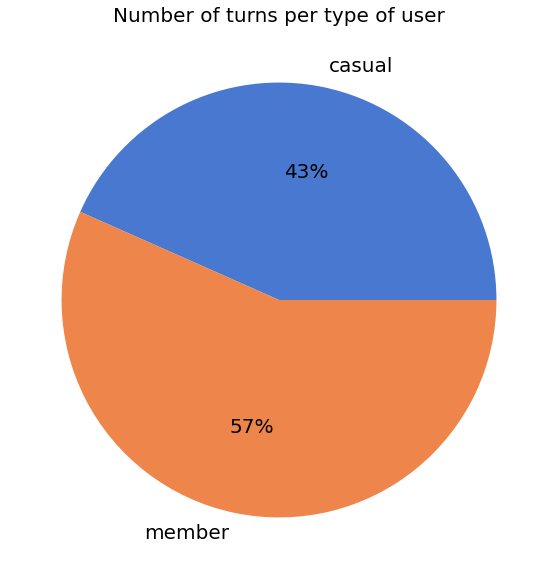

In [12]:
palette_color = sns.color_palette('muted')
data = df_overall['Count']
keys = df_overall['Member']

plt.figure(figsize=(20,10))
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%',textprops={'fontsize': 20})
plt.title('Number of turns per type of user',fontsize = 20)
plt.show()
  

It can be clearly seen that although casual riders accounted for a less significant proportion (about 43 percents), their average ride duration was approximately 30 mins, which is two times more than that of member riders. 

**CALCULATE THE NUMBER OF RIDES PER TYPE OF BIKES**

In [13]:
df_bikes = df.loc[df['Ride_Duration'] > timedelta(0)] \
             .groupby(['member_casual', 'rideable_type'], as_index = False, dropna = False) \
             .agg({'Ride_Duration':['max','min','mean'],'ride_id':'count'}) 
df_bikes.columns = ['Member', 'Type', 'Max Ride Duration', 'Min Ride Duration', 'AVG Ride Duration', 'Count']
df_bikes['Percentage'] = df_bikes['Count']/df_bikes['Count'].sum()*100
df_bikes

,Member,Type,Max Ride Duration,Min Ride Duration,AVG Ride Duration,Count,Percentage
0,casual,classic_bike,1 days 01:59:56,0 days 00:00:01,0 days 00:28:27.753818407,1218178,20.647998
1,casual,docked_bike,34 days 02:27:09,0 days 00:00:01,0 days 01:25:15.133515416,253364,4.294495
2,casual,electric_bike,0 days 08:07:16,0 days 00:00:01,0 days 00:18:25.378870432,1086345,18.413442
3,member,classic_bike,1 days 01:59:54,0 days 00:00:01,0 days 00:13:42.955653567,1970959,33.407563
4,member,electric_bike,0 days 10:14:24,0 days 00:00:01,0 days 00:11:55.923640284,1370893,23.236502


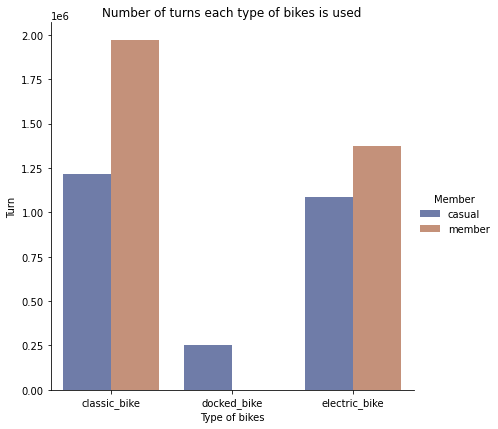

In [14]:
g = sns.catplot(
    data=df_bikes, kind="bar",
    x="Type", y="Count", hue="Member", 
    ci="sd", palette="dark", alpha=.6, height=6) \
    .set(title='Number of turns each type of bikes is used')

g.set_axis_labels("Type of bikes", "Turn")


+ Classic bike was the most popular type of bikes used by both casual and annual members, accounting for over 53 percents of rides. 
+ Docked bike was the least favorite one with no ride by annual members. Although this phenomenon seems suspicious, there is not enough information about company's strategies, number of used bikes, etc to come to any conclusion.

**CALCULATE THE NUMBER OF RIDES ON EACH WEEKDAY**

In [15]:
df_weekdays = df.loc[df['Ride_Duration'] > timedelta(0)] \
             .groupby(['member_casual', 'Weekday'], as_index = False) \
             .agg({'Ride_Duration':['max','min','mean'],'ride_id':'count'}) 
df_weekdays.columns = ['Member', 'Weekday', 'Max Ride Duration', 'Min Ride Duration', 'AVG Ride Duration', 'Count']
df_weekdays['Percentage'] = df_weekdays['Count']/df_weekdays['Count'].sum()*100

df_weekdays['Weekday'].replace({
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
    },inplace = True)

df_weekdays


,Member,Weekday,Max Ride Duration,Min Ride Duration,AVG Ride Duration,Count,Percentage
0,casual,Monday,21 days 13:11:13,0 days 00:00:01,0 days 00:30:37.709889560,303967,5.152211
1,casual,Tuesday,17 days 08:47:51,0 days 00:00:01,0 days 00:25:44.822181336,277738,4.707632
2,casual,Wednesday,24 days 21:00:38,0 days 00:00:01,0 days 00:25:44.610366088,285450,4.838350
3,casual,Thursday,34 days 02:27:09,0 days 00:00:01,0 days 00:27:14.055652436,325143,5.511142
4,casual,Friday,26 days 20:45:16,0 days 00:00:01,0 days 00:28:16.100188671,363065,6.153916
5,casual,Saturday,28 days 06:44:36,0 days 00:00:01,0 days 00:32:14.405223558,535497,9.076622
6,casual,Sunday,28 days 21:49:10,0 days 00:00:01,0 days 00:34:27.608613634,467027,7.916062
7,member,Monday,1 days 00:59:57,0 days 00:00:01,0 days 00:12:38.260234834,469011,7.949691
8,member,Tuesday,1 days 00:59:57,0 days 00:00:01,0 days 00:12:11.524307853,518207,8.783558
9,member,Wednesday,1 days 00:59:58,0 days 00:00:01,0 days 00:12:12.541218221,516507,8.754743


In [16]:
rides_per_weekday = df_weekdays.groupby('Weekday') \
               .agg({'Count':'sum'}) \
               .sort_values('Count', ascending = False)
rides_per_weekday

,Count
Weekday,
Saturday,979621
Sunday,865908
Thursday,851044
Friday,832286
Wednesday,801957
Tuesday,795945
Monday,772978


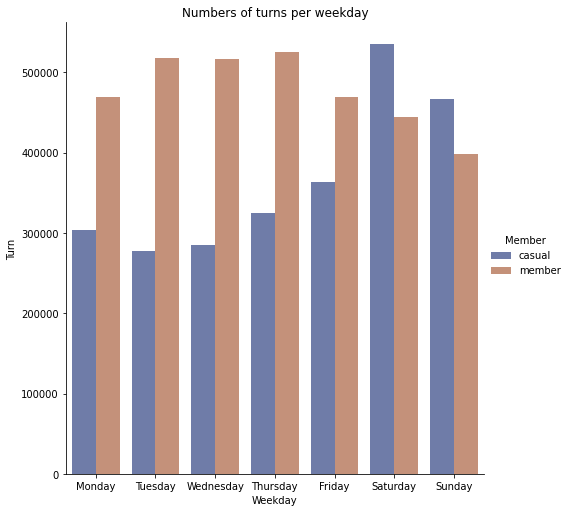

In [17]:
g = sns.catplot(
    data=df_weekdays, kind="bar",
    x="Weekday", y="Count", hue="Member",
    ci="sd", palette="dark", alpha=.6, height=7) \
    .set(title='Numbers of turns per weekday')

g.set_axis_labels("Weekday", "Turn")

+ The number of rides significantly rose on Saturday (979621), followed by Sunday (865908). 
+ In the middle of the week (Tuesday, Wednesday), the number of rides by annual members are twice or three over two as many as that of casual members. However, the closer it is to the end of the week, the figures of casual members remarkably increased while that of annual members reduced. 

**CALCULATE THE NUMBER OF RIDES ON EACH MONTH**

In [18]:
df_months = df.loc[df['Ride_Duration'] > timedelta(0)] \
             .groupby(['member_casual', 'month'], as_index = False) \
             .agg({'Ride_Duration':['max','min','mean'],'ride_id':'count'}) 
df_months.columns = ['Member', 'Month', 'Max Ride Duration', 'Min Ride Duration', 'AVG Ride Duration', 'Count']
df_months['Month'].replace({
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}, inplace = True)

df_months['Percentage'] = df_months['Count']/df_months['Count'].sum()*100

df_months


,Member,Month,Max Ride Duration,Min Ride Duration,AVG Ride Duration,Count,Percentage
0,casual,Jan,20 days 07:51:06,0 days 00:00:01,0 days 00:30:22.942593292,18517,0.313861
1,casual,Feb,7 days 13:45:58,0 days 00:00:01,0 days 00:26:42.656719902,21414,0.362965
2,casual,Mar,23 days 20:34:04,0 days 00:00:01,0 days 00:32:37.521697042,89874,1.523356
3,casual,Apr,14 days 16:02:12,0 days 00:00:01,0 days 00:29:32.211981202,126398,2.142434
4,casual,May,25 days 04:17:48,0 days 00:00:01,0 days 00:30:52.361707211,280387,4.752532
5,casual,Jun,24 days 21:00:38,0 days 00:00:01,0 days 00:32:06.091433573,369022,6.254887
6,casual,Jul,34 days 02:27:09,0 days 00:00:01,0 days 00:32:47.610699733,442011,7.492043
7,casual,Aug,28 days 21:49:10,0 days 00:00:01,0 days 00:28:47.446864820,412608,6.993665
8,casual,Sep,22 days 19:38:32,0 days 00:00:01,0 days 00:27:49.129128188,363840,6.167052
9,casual,Oct,28 days 06:25:01,0 days 00:00:01,0 days 00:28:40.699023728,257203,4.359566


In [19]:
rides_per_month = df_months.groupby('Month') \
               .agg({'Count':'sum'}) \
               .sort_values('Count', ascending = False)
rides_per_month

,Count
Month,
Jul,822328
Aug,804245
Jun,769138
Sep,756040
May,634810
Oct,631156
Apr,371218
Nov,359892
Mar,284024


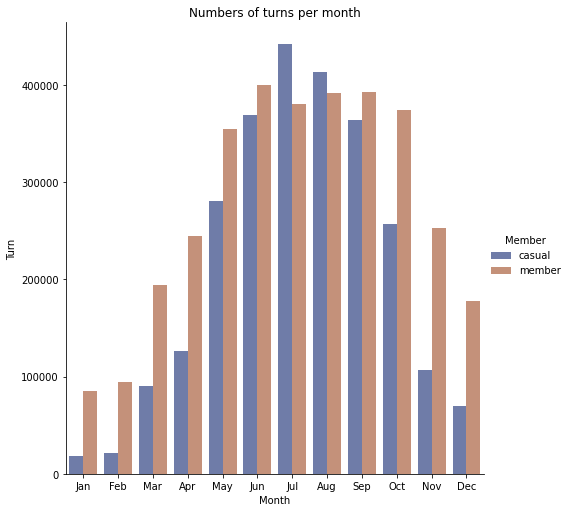

In [20]:
g = sns.catplot(
    data=df_months, kind="bar",
    x="Month", y="Count", hue="Member",
    ci="sd", palette="dark", alpha=.6, height=7) \
    .set(title='Numbers of turns per month')

g.set_axis_labels("Month", "Turn")

+ In both cases (annual and casual members), it can be observed that there is seasonal factor in the number of rides. The figures peaked during the summers, especially on July with approximately 800.000 rides in total, and reached their bottoms in Jan with only 100.000 rides. 
+ If there is data about climate, school breaks, energy consumption, gasoline prices or some other additional information about Chicago, it might be possible to discover the impacts behind this trend. 


**AVERAGE TIME DURATION OF RIDES PER WEEKDAY**

In [21]:
avg_time_weekday = df_weekdays[['Member','Weekday','AVG Ride Duration']]
avg_time_weekday['AVG Ride Duration'] = (avg_time_weekday['AVG Ride Duration'].astype('timedelta64[s]')/60.0).round(decimals = 2)
avg_time_weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Member,Weekday,AVG Ride Duration
0,casual,Monday,30.62
1,casual,Tuesday,25.73
2,casual,Wednesday,25.73
3,casual,Thursday,27.23
4,casual,Friday,28.27
5,casual,Saturday,32.23
6,casual,Sunday,34.45
7,member,Monday,12.63
8,member,Tuesday,12.18
9,member,Wednesday,12.20


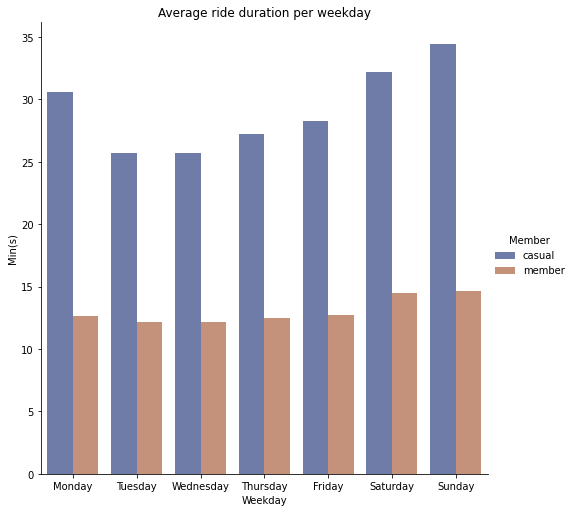

In [22]:
g = sns.catplot(
    data=avg_time_weekday, kind="bar",
    x="Weekday", y="AVG Ride Duration", hue="Member",
    ci="sd", palette="dark", alpha=.6, height=7) \
    .set(title='Average ride duration per weekday')

g.set_axis_labels("Weekday", "Min(s)")

**AVERAGE TIME DURATION OF RIDES PER MONTH**

In [23]:
avg_time_month = df_months[['Member','Month','AVG Ride Duration']]
avg_time_month['AVG Ride Duration'] = (avg_time_month['AVG Ride Duration'].astype('timedelta64[s]')/60.0).round(decimals = 2)
avg_time_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Member,Month,AVG Ride Duration
0,casual,Jan,30.37
1,casual,Feb,26.70
2,casual,Mar,32.62
3,casual,Apr,29.53
4,casual,May,30.87
5,casual,Jun,32.10
6,casual,Jul,32.78
7,casual,Aug,28.78
8,casual,Sep,27.82
9,casual,Oct,28.67


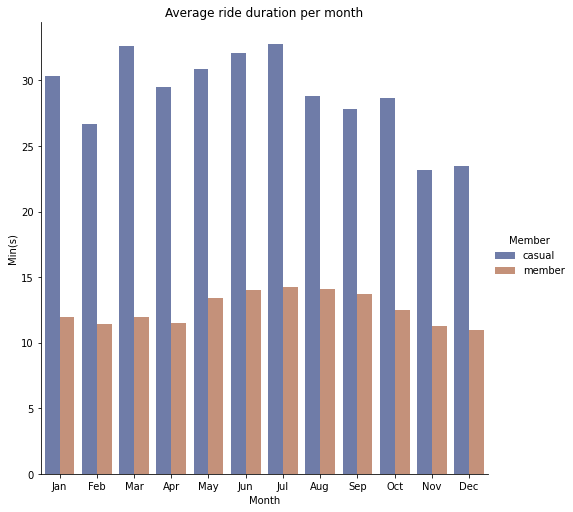

In [24]:
g = sns.catplot(
    data=avg_time_month, kind="bar",
    x="Month", y="AVG Ride Duration", hue="Member",
    ci="sd", palette="dark", alpha=.6, height=7) \
    .set(title='Average ride duration per month')

g.set_axis_labels("Month", "Min(s)")

The average ride duration per month and per weekday of casual members are twofold or even threefold higher than that of annual members. 

**MOST POPULAR ROUTE AMONG CASUAL AND ANNUAL MEMBERS**


*MOST POPULAR ROUTE AMONG CASUAL MEMBERS*


In [25]:
route_cas = df.dropna(subset = ['end_lat','end_lng']).loc[((df['start_lat'] != df['end_lat']) | (df['start_lng'] != df['end_lng'])) & (df['member_casual'] == 'casual')]
route_cas

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_Duration,Weekday,month
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,0 days 00:35:22,4,7
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,0 days 00:18:27,2,7
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,0 days 00:19:03,2,7
5,62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900328,-87.696735,41.913887,-87.705128,casual,0 days 00:05:52,3,7
6,4BBB6E80E6A2A16D,classic_bike,2021-07-28 16:51:47,2021-07-28 17:03:45,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900363,-87.696704,41.914027,-87.705126,casual,0 days 00:11:58,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900363,7D3477086D771D23,electric_bike,2022-06-08 07:38:49,2022-06-08 07:43:09,Kingsbury St & Kinzie St,KA1503000043,Clark St & Randolph St,TA1305000030,41.889039,-87.638443,41.884576,-87.631890,casual,0 days 00:04:20,2,6
5900367,BBEDFFC5151A999F,classic_bike,2022-06-20 21:09:06,2022-06-20 21:15:18,Aberdeen St & Monroe St,13156,May St & Taylor St,13160,41.880419,-87.655519,41.869482,-87.655486,casual,0 days 00:06:12,0,6
5900371,044C69AD133CA722,classic_bike,2022-06-27 19:27:11,2022-06-27 20:09:54,Streeter Dr & Grand Ave,13022,Lincoln Ave & Waveland Ave,13253,41.892278,-87.612043,41.948797,-87.675278,casual,0 days 00:42:43,0,6
5900372,0F124A0CC380A05F,electric_bike,2022-06-23 19:13:58,2022-06-23 19:40:46,Streeter Dr & Grand Ave,13022,Clarendon Ave & Junior Ter,13389,41.892201,-87.611848,41.961004,-87.649603,casual,0 days 00:26:48,3,6


In [96]:
pop_cas = route_cas.groupby(['start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng'], as_index = False) \
          .agg({'ride_id':'count'}) \
          .sort_values('ride_id', ascending = False)
pop_cas = pop_cas.iloc[:50]
pop_cas

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,ride_id
219189,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,41.880958,-87.616743,41.892278,-87.612043,4096
578271,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St,41.892278,-87.612043,41.880958,-87.616743,2232
578559,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & North Blvd,41.892278,-87.612043,41.911722,-87.626804,1867
231482,Dusable Harbor,Streeter Dr & Grand Ave,41.886976,-87.612813,41.892278,-87.612043,1862
586042,Streeter Dr & Grand Ave,Theater on the Lake,41.892278,-87.612043,41.926277,-87.630834,1736
582193,Streeter Dr & Grand Ave,Millennium Park,41.892278,-87.612043,41.881032,-87.624084,1716
581342,Streeter Dr & Grand Ave,Michigan Ave & Oak St,41.892278,-87.612043,41.900960,-87.623777,1519
224149,DuSable Lake Shore Dr & North Blvd,Streeter Dr & Grand Ave,41.911722,-87.626804,41.892278,-87.612043,1498
424742,Millennium Park,Streeter Dr & Grand Ave,41.881032,-87.624084,41.892278,-87.612043,1497
590571,Theater on the Lake,Streeter Dr & Grand Ave,41.926277,-87.630834,41.892278,-87.612043,1457


In [113]:
my_map = folium.Map(
    location = [41.880958, -87.616743],
    zoom_start = 10 
)

for _,tmp in pop_cas.iterrows():
  folium.Marker(
      location = [tmp['start_lat'], tmp['start_lng']],
      tooltip = tmp['start_station_name'],
      icon = folium.Icon(color='lightgray',icon = 'bicycle', prefix = 'fa')
  ).add_to(my_map)

  folium.Marker(
      location = [tmp['end_lat'], tmp['end_lng']],
      tooltip = tmp['end_station_name'],
      icon = folium.Icon(color='lightgray',icon = 'bicycle', prefix = 'fa')
  ).add_to(my_map)

  points = []
  points.append([tmp['start_lat'], tmp['start_lng']])
  points.append([tmp['end_lat'], tmp['end_lng']])

  folium.PolyLine(points, 
        tooltip = tmp['ride_id'],          
        color='#403a3c').add_to(my_map)

my_map

*MOST POPULAR ROUTE AMONG ANNUAL MEMBERS*


In [114]:
route_an = df.dropna(subset = ['end_lat','end_lng']).loc[((df['start_lat'] != df['end_lat']) | (df['start_lng'] != df['end_lng'])) & (df['member_casual'] == 'member')]
route_an

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_Duration,Weekday,month
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,0 days 00:17:50,6,7
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,0 days 00:15:02,3,7
8,61F0D07D1EEE72EE,classic_bike,2021-07-02 18:18:22,2021-07-02 18:38:21,Sheridan Rd & Montrose Ave,TA1307000107,Southport Ave & Clybourn Ave,TA1309000030,41.961670,-87.654640,41.920771,-87.663712,member,0 days 00:19:59,4,7
9,09B4551386A8410E,classic_bike,2021-07-29 21:54:05,2021-07-29 22:07:26,Sheridan Rd & Montrose Ave,TA1307000107,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.961670,-87.654640,41.984037,-87.652310,member,0 days 00:13:21,3,7
10,337670C1ADD3A310,classic_bike,2021-07-26 18:30:10,2021-07-26 18:57:36,Drake Ave & Montrose Ave,KA1504000097,Winchester (Ravenswood) Ave & Balmoral Ave,KA1504000147,41.961154,-87.716569,41.979762,-87.677530,member,0 days 00:27:26,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900374,300258D99D023528,classic_bike,2022-06-27 08:02:39,2022-06-27 08:07:03,Franklin St & Adams St (Temp),TA1309000008,Clark St & Randolph St,TA1305000030,41.879434,-87.635504,41.884576,-87.631890,member,0 days 00:04:24,0,6
5900375,ED7BB4A56EE60673,electric_bike,2022-06-14 07:06:56,2022-06-14 07:11:29,Franklin St & Adams St (Temp),TA1309000008,Clark St & Randolph St,TA1305000030,41.878525,-87.635870,41.884576,-87.631890,member,0 days 00:04:33,1,6
5900376,124B0EDFDFC24764,electric_bike,2022-06-15 19:10:07,2022-06-15 19:12:05,Blue Island Ave & 18th St,13135,Racine Ave & 18th St,13164,41.857434,-87.661493,41.858166,-87.656495,member,0 days 00:01:58,2,6
5900377,BC12300141A81206,classic_bike,2022-06-19 11:53:33,2022-06-19 12:22:46,Blue Island Ave & 18th St,13135,Michigan Ave & Oak St,13042,41.857556,-87.661535,41.900960,-87.623777,member,0 days 00:29:13,6,6


In [115]:
pop_an =  route_an.groupby(['start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng'], as_index = False) \
          .agg({'ride_id':'count'}) \
          .sort_values('ride_id', ascending = False)
pop_an = pop_an.iloc[:50]
pop_an

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,ride_id
289890,Ellis Ave & 60th St,University Ave & 57th St,41.785097,-87.601073,41.791478,-87.599861,5086
288963,Ellis Ave & 60th St,Ellis Ave & 55th St,41.785097,-87.601073,41.794301,-87.601450,4962
713590,University Ave & 57th St,Ellis Ave & 60th St,41.791478,-87.599861,41.785097,-87.601073,4860
287621,Ellis Ave & 55th St,Ellis Ave & 60th St,41.794301,-87.601450,41.785097,-87.601073,4409
82810,Calumet Ave & 33rd St,State St & 33rd St,41.834900,-87.617930,41.834734,-87.625813,2060
680279,State St & 33rd St,Calumet Ave & 33rd St,41.834734,-87.625813,41.834900,-87.617930,1971
472438,Loomis St & Lexington St,Morgan St & Polk St,41.872187,-87.661501,41.871737,-87.651030,1863
534672,Morgan St & Polk St,Loomis St & Lexington St,41.871737,-87.651030,41.872187,-87.661501,1714
289234,Ellis Ave & 60th St,Ellis Ave & 58th St,41.785097,-87.601073,41.788746,-87.601334,1714
288398,Ellis Ave & 58th St,Ellis Ave & 60th St,41.788746,-87.601334,41.785097,-87.601073,1576


In [120]:
my_map = folium.Map(
    location = [41.785097, -87.601073],
    zoom_start = 10 
)

for _,tmp in pop_an.iterrows():
  folium.Marker(
      location = [tmp['start_lat'], tmp['start_lng']],
      tooltip = tmp['start_station_name'],
      icon = folium.Icon(color='lightpink',icon = 'bicycle', prefix = 'fa')
  ).add_to(my_map)

  folium.Marker(
      location = [tmp['end_lat'], tmp['end_lng']],
      tooltip = tmp['end_station_name'],
      icon = folium.Icon(color='lightpink',icon = 'bicycle', prefix = 'fa')
  ).add_to(my_map)

  points = []
  points.append([tmp['start_lat'], tmp['start_lng']])
  points.append([tmp['end_lat'], tmp['end_lng']])

  folium.PolyLine(points, 
        tooltip = tmp['ride_id'],          
        color='#cc023e').add_to(my_map)

my_map

The map showed that most of the trips of casual riders located in the center of the city, while annual members divided into smaller groups and most of them were in the outskirts of the city. 

**<h1> SHARE**

**CONCLUSION**

By observing the data from July 1st 2021 to June 30th 2022, some insights about the differences between the casual and annual memberswere revealed, which may help the company plan out effective marketing strategies:
1.   Among the available types of bikes, classic bikes were the most popular one, while docked bikes, which was not used even once by annual members over the observed period, accounted for the least proportion. 
2.   In the middle of a week, the number of rides of annual members were significantly higher than that of casual riders. However, on the weekend, especially on Saturday, this trend was reversed. 
3.   When it comes to the number of rides per month, seasonal factor was discovered. The figures peaked during the summers and reached their bottoms in winter.
4.  At most of the time, the average ride duration of casual members were twofold or even threefold that of the annual members. 
5.  Most of the trips of casual riders located in the center of the city, while annual members divided into smaller groups and most of them were in the outskirts of the city.
<p> 
**<p> RECOMMENDATION**  
In order to maximizing the profit, the company marketing teams should:
+ Focus on leisure aspect of service, such as open more stations near entertainment facilities. 
+ Add some promotions for customers who traveling long distances.
+ Release seasonal passes.